In [6]:
from google.colab import files
f = files.upload()

Saving creditcard.csv to creditcard (2).csv


In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163391 entries, 0 to 163390
Data columns (total 31 columns):
Time      163391 non-null float64
V1        163391 non-null float64
V2        163391 non-null float64
V3        163391 non-null float64
V4        163391 non-null float64
V5        163391 non-null float64
V6        163391 non-null float64
V7        163391 non-null float64
V8        163391 non-null float64
V9        163391 non-null float64
V10       163391 non-null float64
V11       163391 non-null float64
V12       163391 non-null float64
V13       163391 non-null float64
V14       163391 non-null float64
V15       163391 non-null float64
V16       163391 non-null float64
V17       163391 non-null float64
V18       163391 non-null float64
V19       163391 non-null float64
V20       163391 non-null float64
V21       163391 non-null float64
V22       163391 non-null float64
V23       163391 non-null float64
V24       163391 non-null float64
V25       163391 non-null float64
V26  

In [4]:
val = pd.value_counts(df['Class'])
val

0.0    163033
1.0       357
Name: Class, dtype: int64

Text(0.5, 0, 'no if transaction')

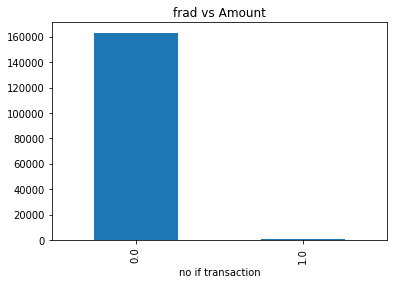

In [5]:
val.plot(kind = 'bar')
plt.title('frad vs Amount')
plt.xlabel('no if transaction')

In [0]:
Fraud = df[df['Class']==1]
Correct = df[df['Class']==0]

In [7]:
len(Fraud), len(Correct)

(357, 163033)

In [8]:
len(Fraud.Amount)
len(Correct.Amount)


163033

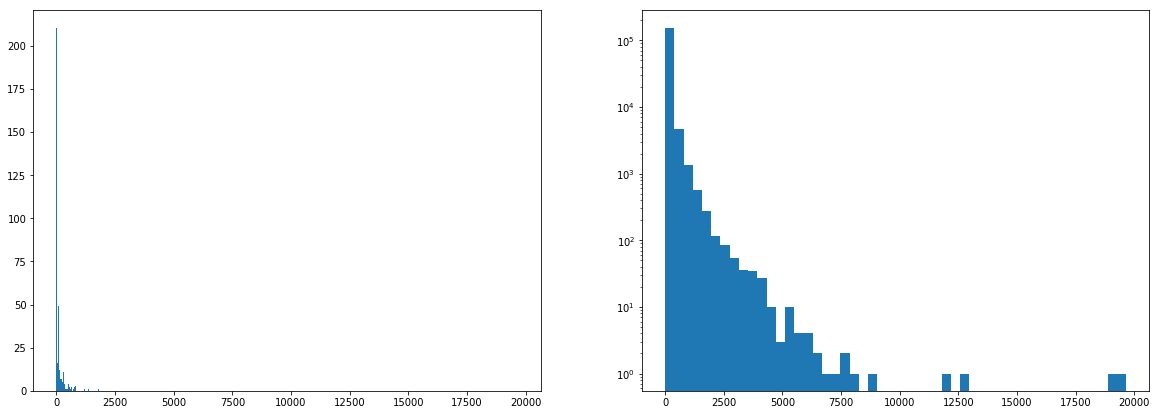

In [9]:
f, (a, b) = plt.subplots(1,2, sharex=True)
f.set_figwidth(20)
f.set_figheight(7)

a.hist(Fraud.Amount, bins=50)
a.set_label('Fraud')
b.hist(Correct.Amount, bins=50)
b.set_label('Normal')
plt.yscale('log')


Text(0.5, 1.0, 'Nornal Trasaction (Time vs amount )')

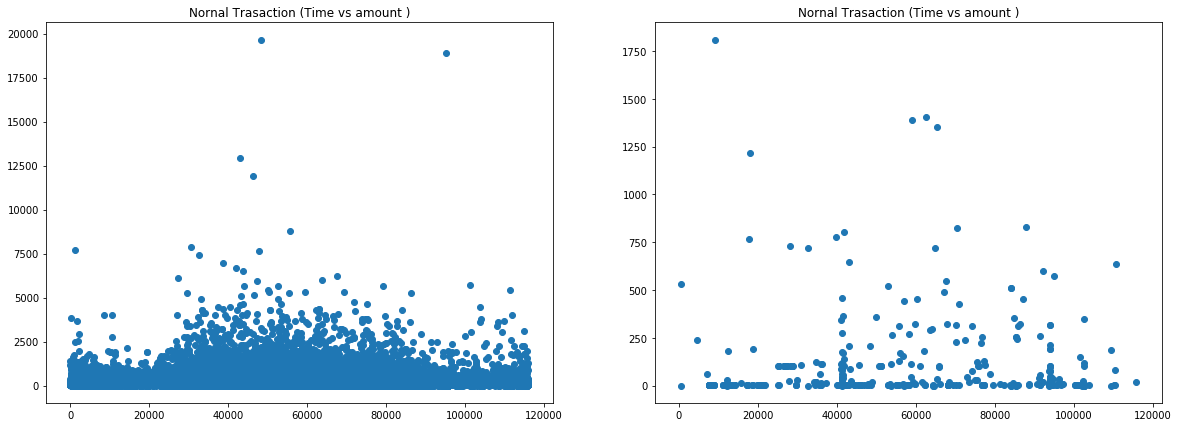

In [10]:
f1, (a1, b1) = plt.subplots(1, 2, sharex=True)
f1.set_figwidth(20)
f1.set_figheight(7)

a1.scatter(Correct.Time, Correct.Amount)
a1.set_title('Nornal Trasaction (Time vs amount )')

b1.scatter(Fraud.Time, Fraud.Amount)
b1.set_title('Nornal Trasaction (Time vs amount )')

# Feature Selection

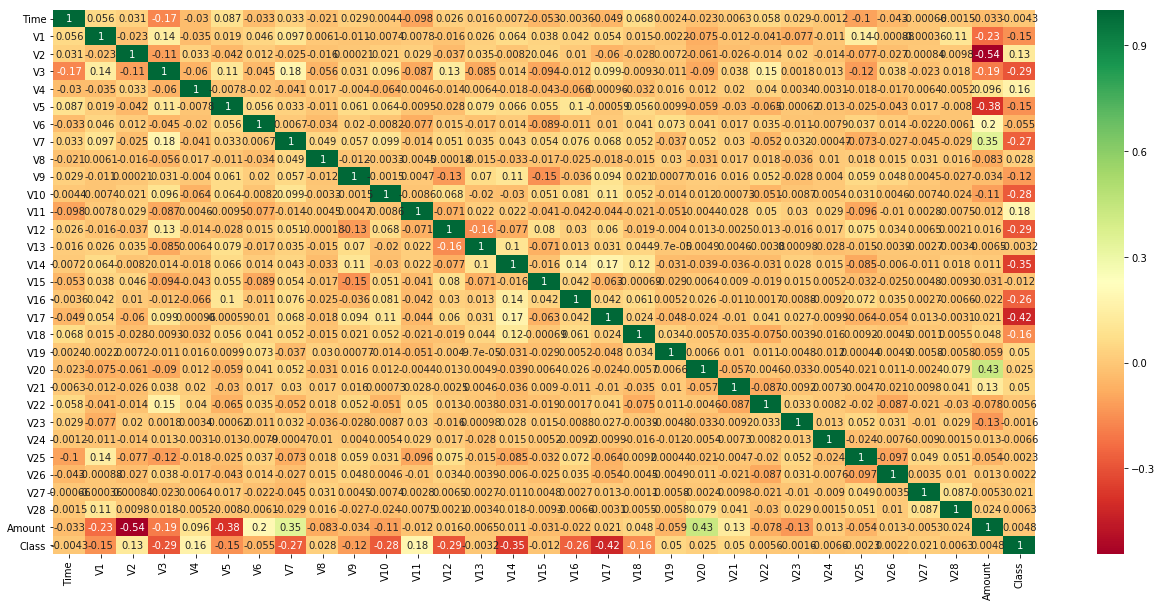

In [11]:
plt.figure(figsize = (22, 10))
sns.heatmap(df.corr(), cmap='RdYlGn', annot=True)

In [0]:
df.dropna(inplace=True)

In [0]:
from sklearn.ensemble import ExtraTreesClassifier

In [0]:
Xs = np.array(df.drop(['Class'],1))
ys = np.array(df['Class'])

In [0]:
clf = ExtraTreesClassifier()


In [16]:
model = clf.fit(Xs, ys)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [17]:
model.feature_importances_

array([0.01761345, 0.0092249 , 0.00768554, 0.02809101, 0.06300909,
       0.01190005, 0.01426634, 0.02196058, 0.01639116, 0.03102824,
       0.07086915, 0.09907647, 0.08396219, 0.01149718, 0.05621392,
       0.01612462, 0.06565739, 0.15803894, 0.08132235, 0.02197051,
       0.01317663, 0.01459877, 0.0094918 , 0.00766851, 0.01333177,
       0.01059182, 0.0197187 , 0.00743192, 0.00859161, 0.00949538])

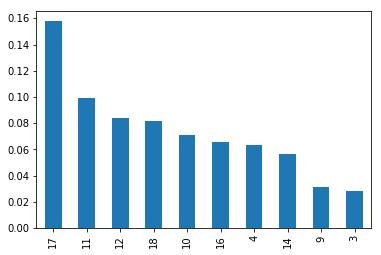

In [20]:
feature_importance = pd.Series(model.feature_importances_)
feature_importance.nlargest(10).plot(kind = 'bar')

In [21]:
outliners = len(Fraud)/len(Correct)
outliners

0.0021897407273374103

In [0]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

In [0]:
classifier = {
    "Isolation Forest" : IsolationForest(n_estimators=100, 
                                       max_samples=len(Xs), 
                                       contamination=outliners, 
                                       random_state = np.random.RandomState(42), 
                                       verbose=0), 
    "SVM" : OneClassSVM(kernel='rbf',
                     degree=3, 
                     gamma=0.1, 
                     nu=0.5,
                     max_iter=-1,
                     random_state = np.random.RandomState(42))
}


In [25]:
type(classifier)

dict

In [0]:
for i, (clf_name, clf) in enumerate (classifier.items()):
  if clf_name == 'Isolation Forest':
    y_pred = clf.fit_predict(Xs)
  
  elif clf_name == 'SVM':
    y_pred = clf.fit_predict(Xs)
    
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != ys).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(ys,y_pred))
    print("Classification Report :")
    print(classification_report(ys,y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/classes.py:1194: DeprecationWarning: The random_state parameter is deprecated and will be removed in version 0.22.
  " be removed in version 0.22.", DeprecationWarning)
